In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
# Example synthetic heart rate data
np.random.seed(0)
heart_rate_data = pd.DataFrame({
    'heart_rate': np.random.normal(75, 10, 1000)  # Simulate a normal distribution of heart rates
})


In [6]:
def calculate_nn_intervals(heart_rate):
    # Approximate NN intervals in milliseconds
    nn_intervals = 60000 / heart_rate  # 60,000 ms in a minute divided by heart rate
    return nn_intervals

def calculate_sdnn(nn_intervals):
    return np.std(nn_intervals)

def calculate_rmssd(nn_intervals):
    diff_nn_intervals = np.diff(nn_intervals)
    return np.sqrt(np.mean(diff_nn_intervals ** 2))


We’ll assign labels based on heart rate ranges commonly associated with each condition:

- Normal: 60–100 bpm
- Tachycardia: >100 bpm
- Arrhythmia: Fluctuations or inconsistencies (simulated here by sudden jumps in heart rate)

In [7]:
max(np.random.normal(110, 5, 600))

np.float64(125.8548738664509)

In [8]:

import numpy as np
import pandas as pd

heart_rate_data = pd.DataFrame(columns=['heart_rate', 'condition'])

# Generate normal heart rates (60-100 bpm)
normal_rates = np.random.normal(75, 5, 600)
normal_df = pd.DataFrame({
    'heart_rate': normal_rates,
    'condition': 0  # Label 'Normal'
})

# Generate tachycardia heart rates (>100 bpm)
tachycardia_rates = np.random.normal(110, 5, 200)
tachycardia_df = pd.DataFrame({
    'heart_rate': tachycardia_rates,
    'condition': 2  # Label 'Tachycardia'
})

# Generate arrhythmia heart rates with fluctuations (random jumps)
arrhythmia_rates = np.concatenate([
    np.random.normal(75, 5, 100),
    np.random.normal(110, 5, 100),
    np.random.normal(65, 5, 100)
])
arrhythmia_df = pd.DataFrame({
    'heart_rate': arrhythmia_rates,
    'condition': 1  # Label 'Arrhythmia'
})

# Concatenate all the data into a single DataFrame
heart_rate_data = pd.concat([normal_df, tachycardia_df, arrhythmia_df], ignore_index=True)

# Shuffle the data to avoid order bias
heart_rate_data = heart_rate_data.sample(frac=1, random_state=0).reset_index(drop=True)


In [9]:
# Calculate NN intervals for each heart rate row
heart_rate_data['nn_intervals'] = heart_rate_data['heart_rate'].apply(lambda x: calculate_nn_intervals(x))

# Generate mock sequences for each row to calculate HRV metrics (for demo purposes)
# Assume 10 NN intervals for each row around the given heart rate to calculate HRV metrics

def generate_nn_sequence(heart_rate):
    # Simulate a series of NN intervals around a base heart rate to calculate HRV metrics
    base_nn_interval = 60000 / heart_rate
    simulated_variability = np.random.normal(0, 50, 10)  # Adding slight variation to simulate heartbeat changes
    nn_sequence = base_nn_interval + simulated_variability
    return nn_sequence

# Apply the above function to generate NN sequences for HRV calculation
heart_rate_data['nn_sequence'] = heart_rate_data['heart_rate'].apply(generate_nn_sequence)

# Calculate SDNN and RMSSD using the generated NN sequences
heart_rate_data['sdnn'] = heart_rate_data['nn_sequence'].apply(calculate_sdnn)
heart_rate_data['rmssd'] = heart_rate_data['nn_sequence'].apply(calculate_rmssd)

# Drop 'nn_sequence' column if you only want SDNN and RMSSD in the final output
heart_rate_data = heart_rate_data.drop(columns=['nn_sequence'])



In [10]:
heart_rate_data

,heart_rate,condition,nn_intervals,sdnn,rmssd
0,75.488754,0,794.820378,49.445604,39.989432
1,70.324364,1,853.189373,34.553710,39.953771
2,77.524850,0,773.945387,58.361376,82.363114
3,109.578884,2,547.550751,39.743684,61.925848
4,65.871865,1,910.859284,53.629759,57.659527
...,...,...,...,...,...
1095,70.120825,1,855.665921,39.048972,53.092758
1096,103.891118,2,577.527713,34.335340,52.631999
1097,64.946089,1,923.843163,50.915443,86.451015
1098,67.550335,0,888.226536,46.721986,60.835532


In [11]:
heart_rate_data.to_csv('HRV.csv', index=False)

In [12]:
# Select features and labels
X = heart_rate_data[['heart_rate', 'sdnn', 'rmssd']]
y = heart_rate_data['condition']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Realistic Labels: {accuracy * 100:.2f}%')


Accuracy with Realistic Labels: 74.55%


Testing

In [25]:
def generate_custom_test_data(heart_rate):
    # Generate the NN sequence based on the provided heart rate
    nn_sequence = generate_nn_sequence(heart_rate)
    
    # Calculate SDNN and RMSSD
    sdnn = calculate_sdnn(nn_sequence)
    rmssd = calculate_rmssd(nn_sequence)
    
    # Create the custom test data row as a dictionary
    custom_test_data = {
        'heart_rate': [heart_rate],
        'sdnn': [sdnn],
        'rmssd': [rmssd]
    }
    
    # Return the custom data as a pandas DataFrame
    return pd.DataFrame(custom_test_data)

In [30]:
test_data = generate_custom_test_data(120)

In [33]:
rf_model.predict(test_data)[0]

np.int64(2)

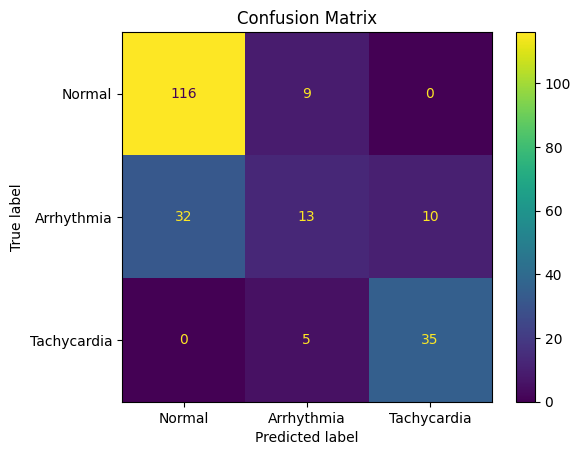

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Arrhythmia', 'Tachycardia']).plot()
plt.title("Confusion Matrix")
plt.show()
